In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import requests
import json

In [2]:
# Dictionary of all the tables and their columns
table_columns = {}

# Dictionary of all dataframes mapped with table names
df_all = {}

# List of all dataframes of all tables
df_list = []

request_tables = ['submissions', 'assignments', 'tags', 'taggings', 'users']

for table in request_tables:
    url = 'http://code.dctacademy.com/api/v1/ml/data/' + table + '?key=6eccc23db96ed84fce329e0d20bdacb4'
    response = requests.get(url)
#     print(response.status_code, response.reason)
    df_all[table] = pd.read_json(response.content)

In [3]:
df_all.keys()

dict_keys(['submissions', 'assignments', 'tags', 'taggings', 'users'])

In [4]:
df_all['submissions']['time_hr'] = df_all['submissions']['time_in_seconds'] / 60 / 60 

In [5]:
user_submissions = df_all['submissions'] \
    .merge(df_all['assignments'], left_on='assignment_id', right_on='id', suffixes=('_submissions', '_assignments')) \
    .merge(df_all['taggings'], left_on='id_assignments', right_on='taggable_id', suffixes=('_sub_ass', '_taggings')) \
    .merge(df_all['tags'], left_on='tag_id', right_on='id', suffixes=('_sub_ass_tag', '_tags'))

In [6]:
user_submissions.columns

Index(['id_submissions', 'statement', 'output', 'user_id_submissions',
       'language', 'assignment_id', 'practice_id', 'created_at_submissions',
       'updated_at_submissions', 'is_checked', 'time_in_seconds', 'pass',
       'fail', 'total', 'points_submissions', 'code_submissions', 'video_url',
       'time_hr', 'id_assignments', 'title', 'body', 'url',
       'created_at_assignments', 'updated_at_assignments',
       'user_id_assignments', 'source', 'is_allowed', 'code_assignments',
       'approved', 'points_assignments', 'minutes', 'function_name',
       'input_size', 'is_front_end', 'display_helper', 'id_sub_ass_tag',
       'tag_id', 'taggable_type', 'taggable_id', 'tagger_type', 'tagger_id',
       'context', 'created_at', 'id_tags', 'name', 'taggings_count'],
      dtype='object')

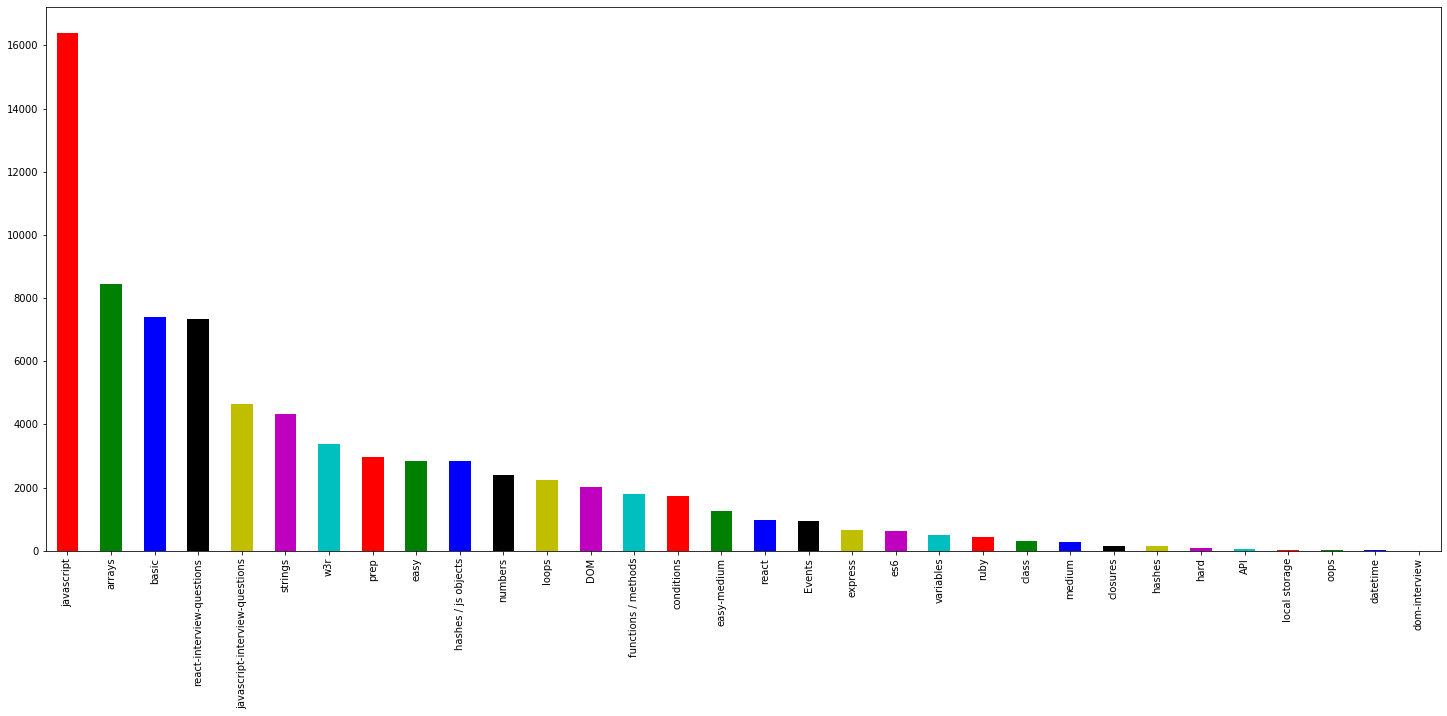

In [7]:
user_submissions['name'] = user_submissions['name'].str.strip().replace('/',',')
user_submissions['name'].value_counts().plot(kind='bar', figsize=(25, 10), color = list('rgbkymc'))
plt.show()

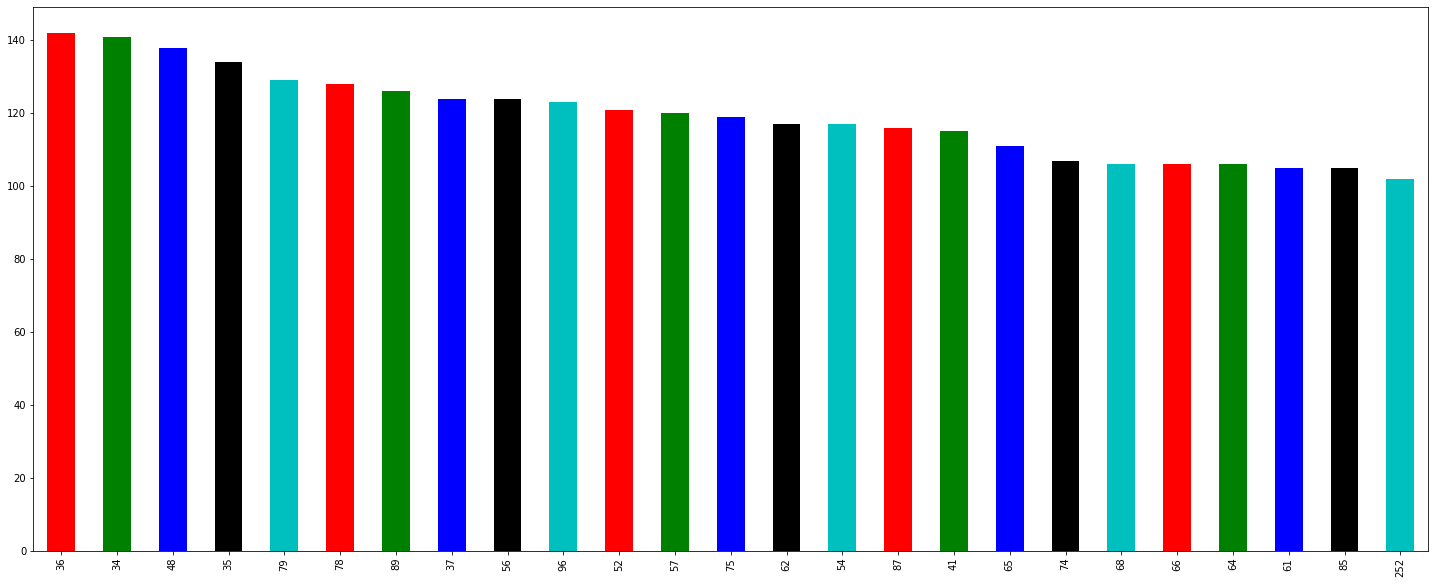

In [8]:
df_all['submissions']['user_id'].value_counts()[:25].plot(kind='bar', figsize=(25, 10), color = list('rgbkc'))
plt.show()

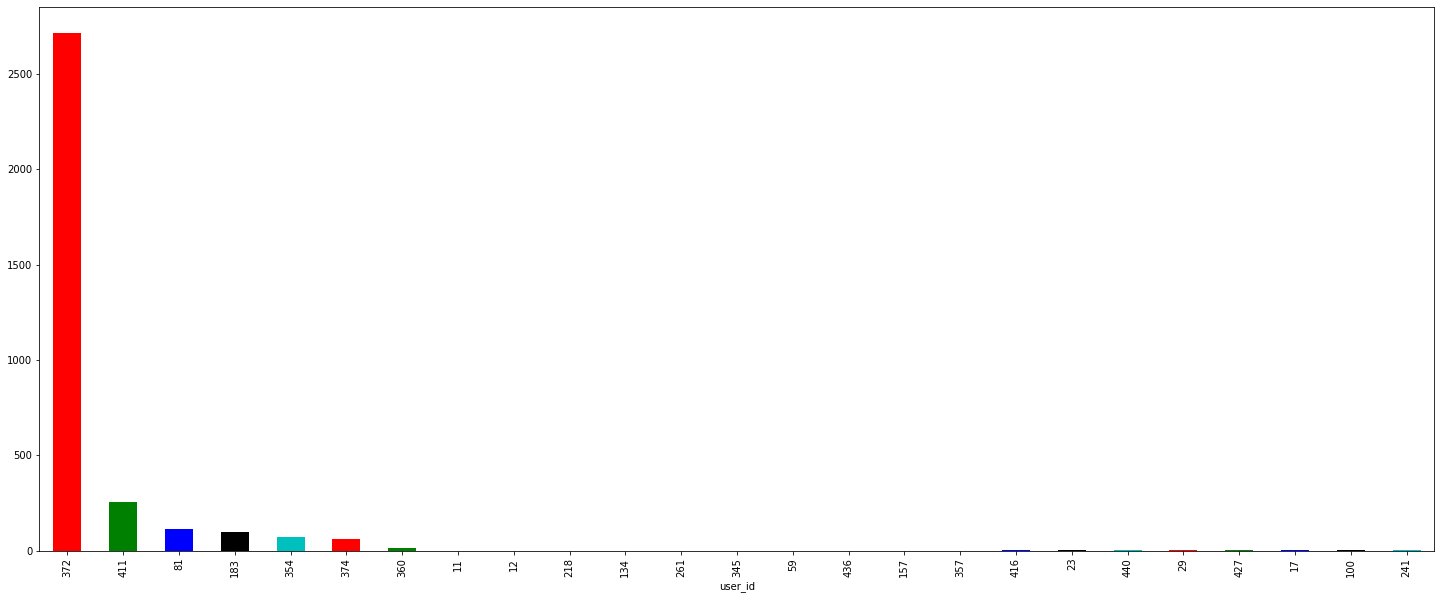

In [9]:
df_all['submissions'].groupby(['user_id']).sum()['time_hr'].sort_values().abs()[:25].plot(kind='bar', figsize=(25, 10), color = list('rgbkc'))
plt.show()

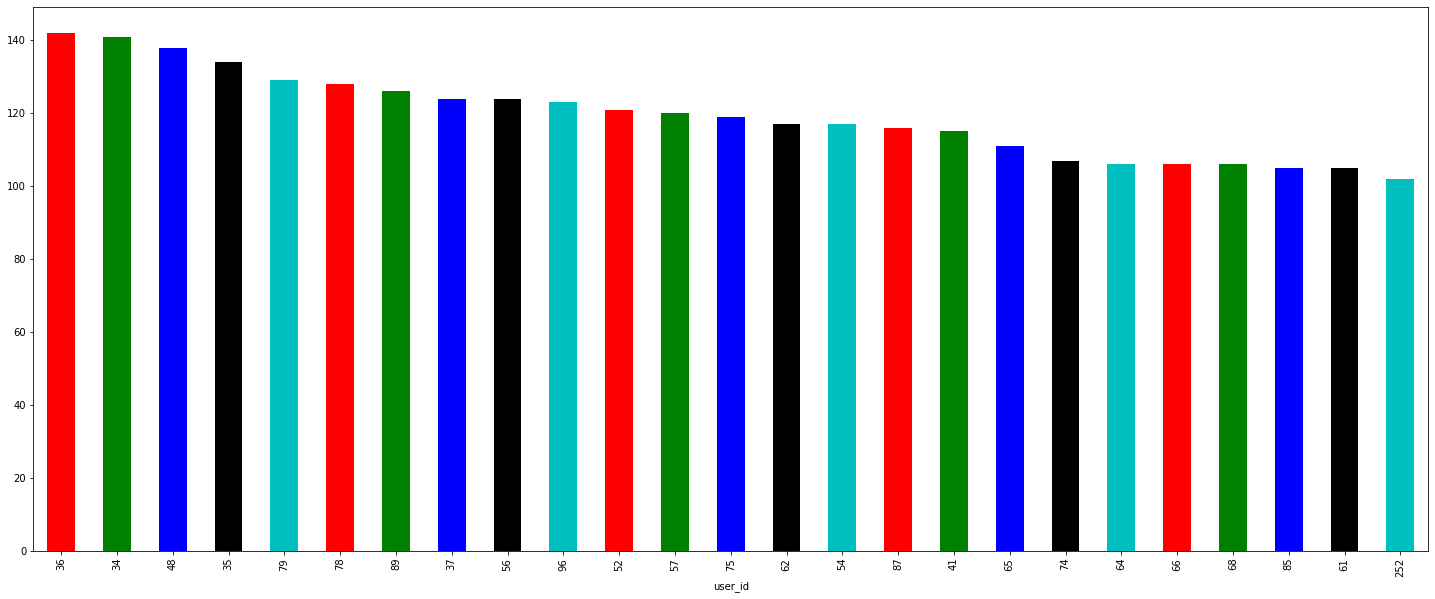

In [10]:
df_all['submissions'].groupby(['user_id']).count()['time_hr'].sort_values(ascending=False).abs()[:25].plot(kind='bar', figsize=(25, 10), color = list('rgbkc'))
plt.show()

In [11]:
df_all['users'][df_all['users']['id'] == 372]

,id,username,email,created_at,updated_at,student_id,allowed_to_log_in
354,372,Roja V. T,rojavt9@gmail.com,2019-11-17 15:00:13.922000+05:30,2019-12-15 22:15:09.741000+05:30,371.0,True


In [12]:
df_all['users'][df_all['users']['id'] == 370]

,id,username,email,created_at,updated_at,student_id,allowed_to_log_in
367,370,Avinash Kulkarni,avinashkulkarni1122@gmail.com,2019-11-13 12:29:51.210000+05:30,2019-12-31 10:02:30.764000+05:30,369.0,True


In [13]:
df_all['users'][df_all['users']['id'] == 36]

,id,username,email,created_at,updated_at,student_id,allowed_to_log_in
64,36,Pallipati Nagaraju,pallipatinagaraju@gmail.com,2018-05-23 12:13:09.647000+05:30,2019-12-24 21:43:10.139000+05:30,34.0,True


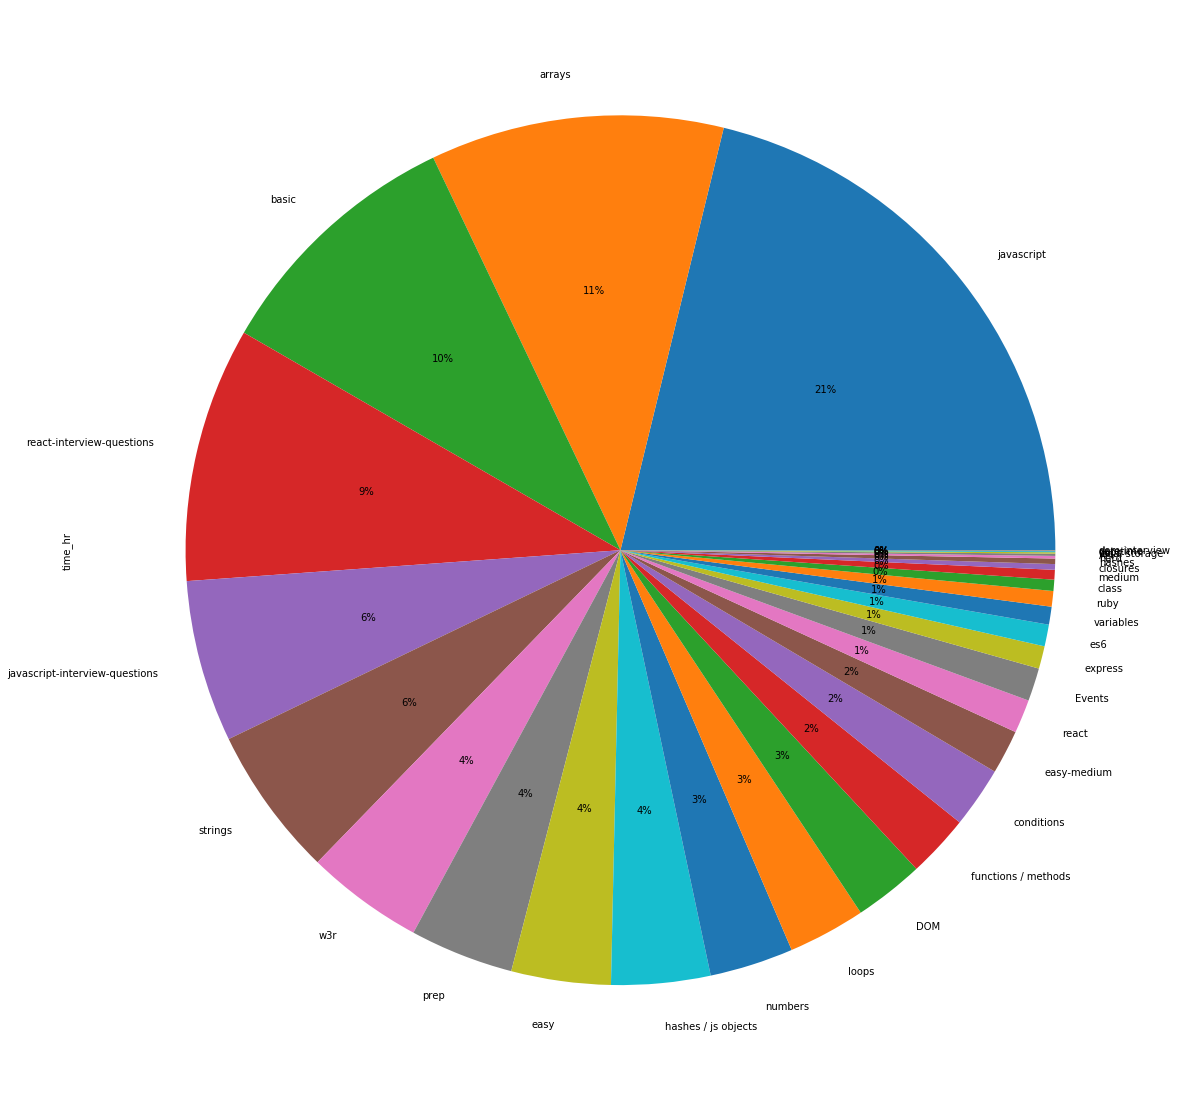

In [14]:
user_submissions.groupby(['name']).count()['time_hr'].sort_values(ascending=False).abs().plot(kind='pie', figsize=(20, 20), autopct='%1.0f%%')
plt.show()

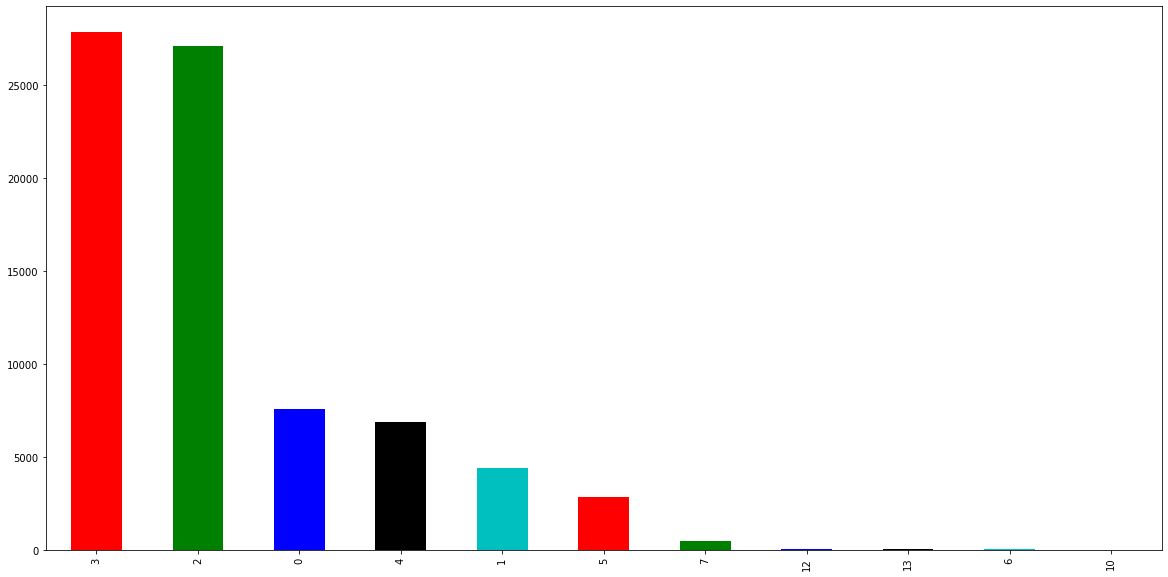

In [19]:
user_submissions['pass'].value_counts().plot(kind='bar', figsize=(20, 10), color = list('rgbkc'))
plt.show()

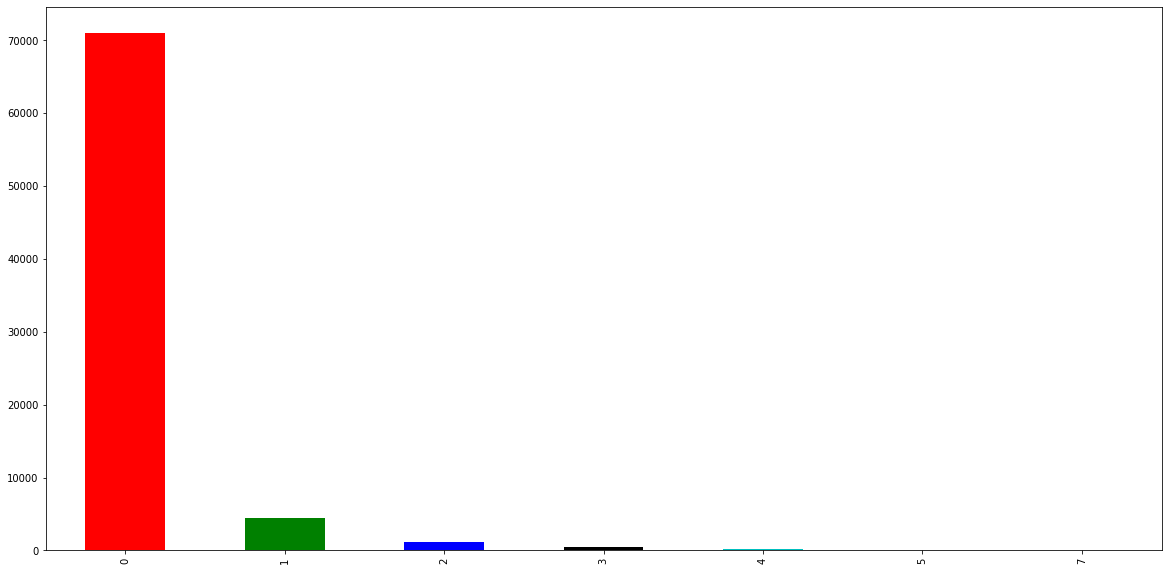

In [21]:
user_submissions['fail'].value_counts().plot(kind='bar', figsize=(20, 10), color = list('rgbkc'))
plt.show()

In [22]:
user_submissions['created_at_submissions'] = pd.to_datetime(user_submissions['created_at_submissions'].dt.date)

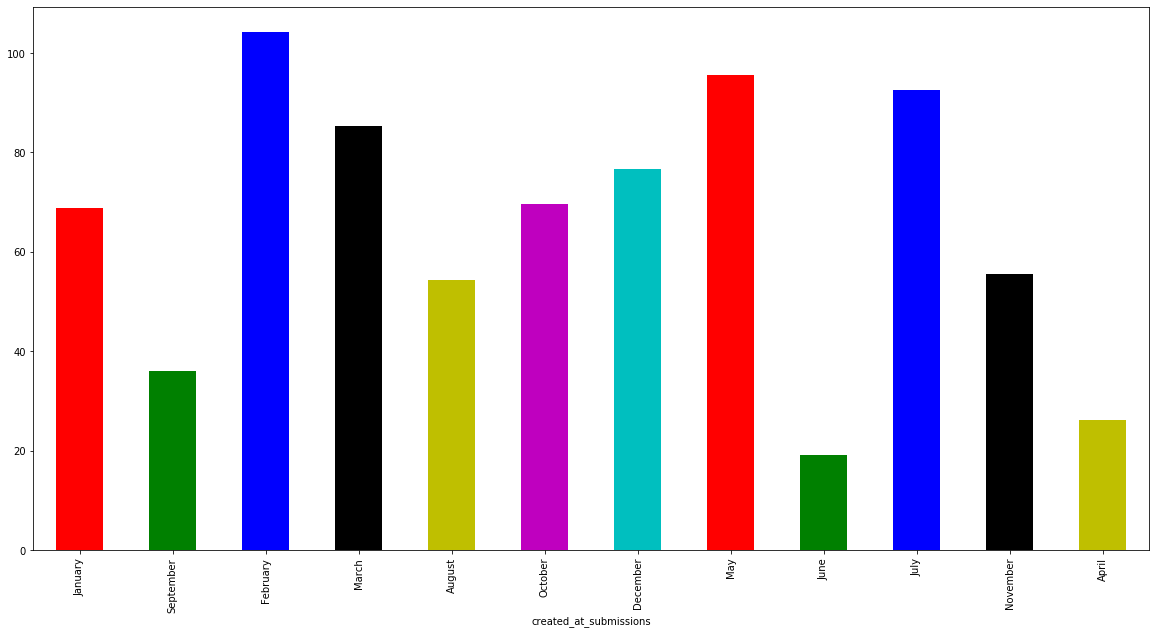

In [26]:
user_submissions.groupby([user_submissions['created_at_submissions'].dt.month_name()], sort=False).mean().eval('time_hr').plot(kind='bar', figsize=(20, 10), color = list('rgbkymc'))
plt.show()

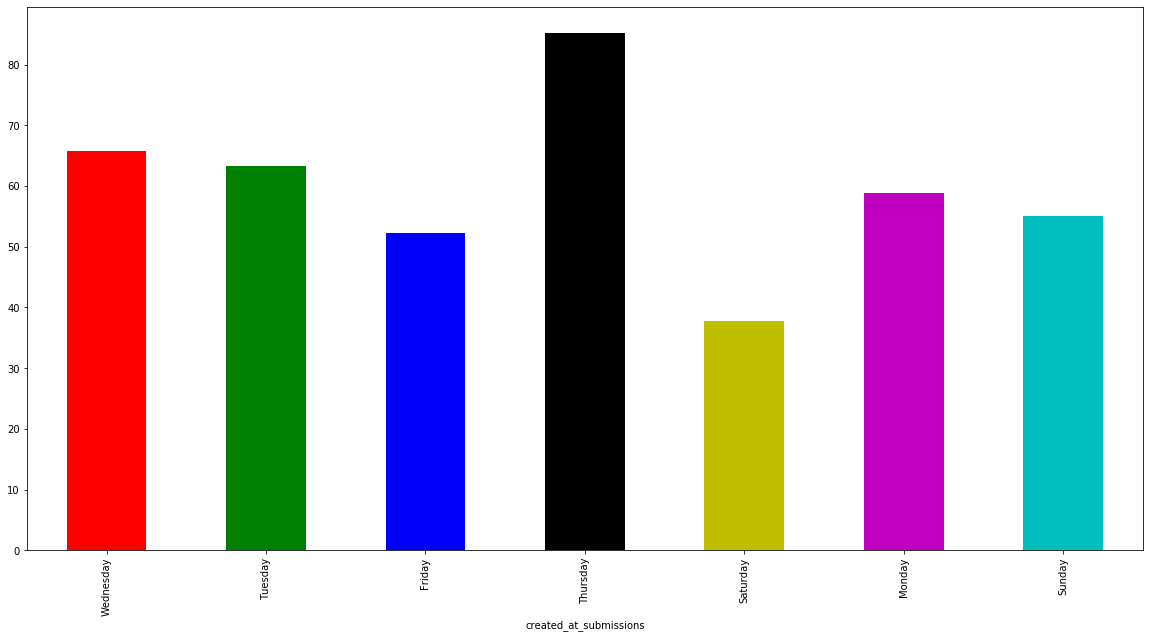

In [27]:
user_submissions.groupby([user_submissions['created_at_submissions'].dt.day_name()], sort=False).mean().eval('time_hr').plot(kind='bar', figsize=(20, 10), color = list('rgbkymc'))
plt.show()

In [48]:
user_submissions['created_at_hr'] = user_submissions['created_at'].dt.hour

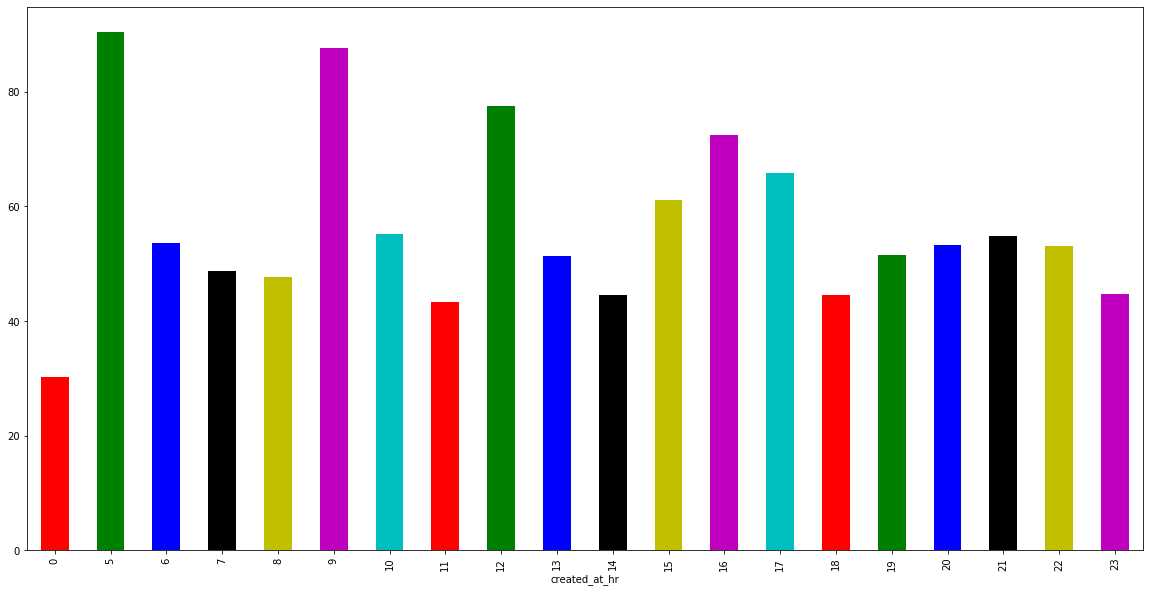

In [51]:
user_submissions.groupby([user_submissions['created_at_hr']]).mean().eval('time_hr').plot(kind='bar', figsize=(20, 10), color = list('rgbkymc'))
plt.show()

In [47]:
user_submissions['created_at_hr']

0        0
1        0
2        0
3        0
4        0
        ..
77363    0
77364    0
77365    0
77366    0
77367    0
Name: created_at_hr, Length: 77368, dtype: int64